In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm 
from scipy import stats
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [2]:
data =  pd.read_csv("D:/College/Predictive/neural_data.csv")

In [3]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [31]:
##################### Outlier check
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier = ((data <(Q1 - 1.5*IQR))| (data > (Q3 + 1.5*IQR))).sum()

In [32]:
print(outlier)

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    2
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn import  metrics

In [34]:
sns.pairplot(data,hue="label", height=3, diag_kind="kde")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B8A3515790> (for post_execute):


KeyboardInterrupt: 

In [20]:
Y = data['label'][:10000] # use more number of rows for more training 
X = data.drop(['label'], axis = 1)[:10000] # use more number of rows for more training 
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=42)

In [72]:
####### KNN Model
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
model = neighbors.KNeighborsClassifier(n_neighbors = 5)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_val) #make prediction on test set
error = sqrt(mean_squared_error(y_val,pred)) #calculate rmse
#rmse_val.append(error) #store rmse values
print('RMSE value is:', error)
knn = neighbors.KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train, y_train)
y_pred= knn.predict(x_val)
#Accuracy_Score = accuracy_score(y_pred,y_test)
#print(Accuracy_Score)
print('KNN score is',knn.score(x_val, y_val))

RMSE value is: 0.9599479152537391
KNN score is 0.952


In [73]:
model = neural_network.MLPClassifier(alpha=1e-5, hidden_layer_sizes=(30,), solver='lbfgs', random_state=18)
model.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1,), random_state=18,
              solver='lbfgs')

In [74]:
predicted = model.predict(x_val)
print("Classification Report:\n %s:" % (metrics.classification_report(y_val, predicted)))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.10      1.00      0.19       210
           2       0.00      0.00      0.00       220
           3       0.00      0.00      0.00       190
           4       0.00      0.00      0.00       188
           5       0.00      0.00      0.00       194
           6       0.00      0.00      0.00       190
           7       0.00      0.00      0.00       233
           8       0.00      0.00      0.00       197
           9       0.00      0.00      0.00       192

    accuracy                           0.10      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.10      0.02      2000
:


c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Frequency')

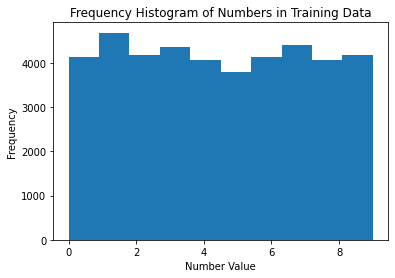

In [75]:
import matplotlib.pyplot as plt
plt.hist(data["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

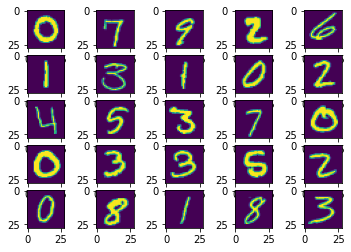

In [76]:
import math
# plot the first 25 digits in the training set. 
f, ax = plt.subplots(5, 5)
# plot some 4s as an example
for i in range(1,26):
    # Create a 1024x1024x3 array of 8 bit unsigned integers
    data1 = data.iloc[i,1:785].values #this is the first number
    nrows, ncols = 28, 28
    grid = data1.reshape((nrows, ncols))
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(grid)

In [4]:
label_train=data['label']
train=data.drop('label', axis=1)

#normalize data
train = train / 255
data['label'] = label_train

NameError: name 'test' is not defined

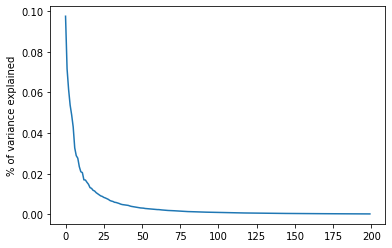

In [5]:
from sklearn import decomposition
from sklearn import datasets

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(data.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
#plot reaches asymptote at around 50, which is optimal number of PCs to use. 

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(data.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(data.drop('label', axis=1)))
PCtrain['label'] = data['label']

#decompose test data
#pca.fit(test)
PCtest = pd.DataFrame(pca.transform(test))


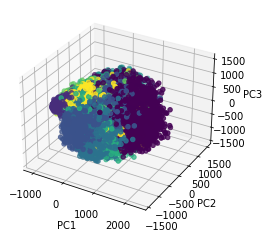

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

x =PCtrain[0]
y =PCtrain[1]
z =PCtrain[2]

colors = [int(i % 9) for i in PCtrain['label']]
ax.scatter(x, y, z, c=colors, marker='o', label=colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


In [8]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:20000]
X=PCtrain.drop('label', axis=1)[0:20000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(30,), random_state=18)
clf.fit(X, y)

c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30,), random_state=18,
              solver='lbfgs')

In [9]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(PCtrain.drop('label', axis=1)[20001:42000])
expected = PCtrain['label'][20001:42000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30,), random_state=18,
              solver='lbfgs'):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2200
           1       0.96      0.98      0.97      2418
           2       0.92      0.92      0.92      2167
           3       0.90      0.90      0.90      2270
           4       0.94      0.91      0.92      2101
           5       0.89      0.89      0.89      2001
           6       0.94      0.96      0.95      2155
           7       0.93      0.95      0.94      2331
           8       0.91      0.89      0.90      2148
           9       0.90      0.89      0.89      2208

    accuracy                           0.93     21999
   macro avg       0.93      0.93      0.93     21999
weighted avg       0.93      0.93      0.93     21999


Confusion matrix:
[[2134    1   12    2    3   15   18    3    8    4]
 [   0 2375    5    6    2    5

In [68]:
data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object